This notebook contains all the finalised plots and summary data used to describe the dataset in the manuscript. 

* [Plots in paper](#plots)
    
    1. [Call component measurements and derived data from individual call analysis](#indcall-rawdata-multipanel)
    1. [Median difference analysis of call parameters with time-interval separated data folds](#datafolds)
    1. [Whole audio analysis results : time-interval separated median differences](#wholeaudiotimesep)
    1. [Expected and observed dominant frequency ranges](#domfreqranges)



#### Date of notebook generation: 2020-10-19
#### Author: Thejasvi Beleyur, AFEG, MPI for Ornithology, Seewiesen

In [1]:
import glob
import os
import pathlib
import json 
import string
import matplotlib.pyplot as plt 
plt.rcParams['agg.path.chunksize'] = 10000
from matplotlib import gridspec
import numpy as np 
import pandas as pd
import seaborn as sns
import soundfile as sf
import tqdm

dB = lambda X: 20*np.log10(np.abs(X))

In [2]:
import sys 
sys.path.append('../individual_call_analysis/analysis/format_and_clean/')

In [3]:
import ind_call_format as icf

In [4]:
%matplotlib notebook

## Plots in paper <a id='plots'></a>

### Individual call comparisons:
This figure describes the median difference distribution of all the individual call characteristics measured. The median difference was compared between calls taken from single and multi bat clips. 

### Plotting the raw individual call data


In [5]:
ind_call = pd.read_csv('indcall_final.csv')

ind_call['groupsize'] = 'NA'
for i,each in ind_call.iterrows():
    if each['num_bats']>1:
        ind_call.loc[i,'groupsize'] = 'z_multi'
    else:
        ind_call.loc[i,'groupsize'] = 'a_single'


In [6]:
for each,fs in ind_call.groupby(['groupsize']):
    print(each)

a_single
z_multi


In [7]:
ind_call.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ifm_start', 'ifm_peak_freq_resolution',
       'ifm_terminal_frequency', 'ifm_duration', 'ifm_peak_frequency',
       'ifm_rms', 'ifm_stop', 'ifm_peak_amplitude', 'ifm_region_id',
       'cf_start', 'cf_peak_freq_resolution', 'cf_terminal_frequency',
       'cf_duration', 'cf_peak_frequency', 'cf_rms', 'cf_stop',
       'cf_peak_amplitude', 'cf_region_id', 'tfm_start',
       'tfm_peak_freq_resolution', 'tfm_terminal_frequency', 'tfm_duration',
       'tfm_peak_frequency', 'tfm_rms', 'tfm_stop', 'tfm_peak_amplitude',
       'tfm_region_id', 'audio_file', 'terminal_frequency_threshold',
       'video_annot_id', 'num_bats', '0', 'duration', 'peak_freq_resolution',
       'ifm-cf_dbratio', 'tfm-cf_dbratio', 'ifm-peak_db', 'tfm-peak_db',
       'tfm_dbrms', 'ifm_dbrms', 'cf_dbrms', 'cf-peak_db', 'ifm_rmsdb',
       'tfm_rmsdb', 'cf_rmsdb', 'ifm_bw', 'tfm_bw', 'annot_end_time',
       'annot_start_time', 'posix_end_time', 'posix_start_time', 'groupsize'

## Data Summaries<a id='datasummary'></a>

### Number of single and multi bat incidences annotated in the videos. 

In [8]:
# get the list of all video annotations made
annot_folder = '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya/'
vidannotation_files = glob.glob(annot_folder+'*.csv')
print(vidannotation_files)

['../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-16_21502300_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-16_2324_Aditya_corrected.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-17_0-1am_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-17_1-2am_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-17_2-3am_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-17_3-4am_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-17_4-5am_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-17_5-6am_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-19_0120-0200_Aditya_corrected.csv', '../whole_data_anal

In [9]:
unread_files = []
annotations = 0
for each in vidannotation_files:
    print(each)

    try:
        df = pd.read_csv(each)
    except UnicodeDecodeError:
        df = pd.read_csv(each, encoding='cp1252')
    print(df.shape)
    annotations += int(df.shape[0])
#    else:
#        print(f'Could not read {os.path.split(each)[-1]}')
#        unread_files.append(each)

../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-16_21502300_Aditya.csv
(111, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-16_2324_Aditya_corrected.csv
(289, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-17_0-1am_Aditya.csv
(83, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-17_1-2am_Aditya.csv
(120, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-17_2-3am_Aditya.csv
(197, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-17_3-4am_Aditya.csv
(222, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-17_4-5am_Aditya.csv
(356, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-17_5-6am_Aditya.csv
(207, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-19_0120-020

In [10]:

print(annotations)

2132


### % multi and % single 


### Number of final audio files availlable for analysis


In [11]:
matched_audio_files = list(pathlib.Path('../individual_call_analysis/hp_annotation_audio/').glob('**/*.WAV'))

In [12]:
len(matched_audio_files)

1181

In [13]:
durations = []
for each in tqdm.tqdm(matched_audio_files):
    durations.append(sf.info(each).duration)

100%|████████████████████████████████████████████████████████████████████████████| 1181/1181 [00:00<00:00, 2495.51it/s]


In [14]:
plt.figure()
plt.violinplot(durations, quantiles=[0.025,0.975], showextrema=False)
plt.text(1.05,50, f'median,$\pm$95%ile: {np.median(durations)}, {np.percentile(durations, 2.5)}-{np.percentile(durations, 97.5)}')
plt.text(1.05,45, f'max-min: {np.min(durations)}-{np.max(durations)}')
plt.text(1.05,40, f'Total audio duration (s): {np.sum(durations)}')
plt.xlim(0.5,1.5)


<IPython.core.display.Javascript object>

(0.5, 1.5)

In [15]:
print(f'{np.sum(durations)/60.0} minutes in total are available for acoustic analysis')

36.97933333333334 minutes in total are available for acoustic analysis


### Number of single and multi bat calls in matched audio files

In [16]:
audiid= os.path.split(matched_audio_files[0])[-1][20:-7]

In [17]:
annot_folder

'../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya/'

In [18]:
allannots = icf.read_all_annotation_files(annot_folder)

In [19]:
#icf.get_num_flying_bats([audiid], annot_folder)

### Number of analysed single + multi bat individual calls

In [20]:
ind_call = pd.read_csv('indcall_final.csv')
# Sample sizes:
single, multi = ind_call[ind_call['num_bats']==1], ind_call[ind_call['num_bats']>1]
print('Single call measurements %d \n and \n multi call measurements %d '%(single.shape[0], multi.shape[0]))
 

Single call measurements 177 
 and 
 multi call measurements 49 


In [21]:
total_n = ind_call.shape[0]
multi_n = multi.shape[0]
single_n = single.shape[0]

pd.DataFrame(data={'N':[total_n,single_n, multi_n, ],'calc':['total','single','multi']}).to_csv('indcall_sample_sizes.csv')

In [22]:
177+49

226

In [23]:
gpsize, n_samples = np.unique(ind_call['num_bats'], return_counts=True)

In [24]:
print(gpsize, n_samples)

[1 2 3 4] [177  40   7   2]


In [25]:
print(f'Total number of individual calls: {single.shape[0]+multi.shape[0]}')

Total number of individual calls: 226


### Range of tFM durations

In [26]:
ind_call

,Unnamed: 0,Unnamed: 0.1,ifm_start,ifm_peak_freq_resolution,ifm_terminal_frequency,ifm_duration,ifm_peak_frequency,ifm_rms,ifm_stop,ifm_peak_amplitude,...,ifm_rmsdb,tfm_rmsdb,cf_rmsdb,ifm_bw,tfm_bw,annot_end_time,annot_start_time,posix_end_time,posix_start_time,groupsize
0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-34.909538,-26.417414,NaN,18.196356,2018-08-16 22:24:26,2018-08-16 22:24:25,1.534451e+09,1.534451e+09,single
1,1,8,0.000100,2427.184466,99.264706,0.816,106617.647059,0.006330,0.000916,0.012207,...,-43.971904,-35.169376,-36.707915,9.386980,19.079493,2018-08-16 22:25:24,2018-08-16 22:25:21,1.534451e+09,1.534451e+09,single
2,2,9,0.000000,1028.806584,103.305785,1.936,105888.429752,0.017799,0.001936,0.050476,...,-34.992221,-36.434588,-16.518988,4.347649,4.928068,2018-08-16 22:25:47,2018-08-16 22:25:44,1.534451e+09,1.534451e+09,single
3,3,10,0.000736,1237.623762,92.039801,1.608,103855.721393,0.020311,0.002344,0.042267,...,-33.845518,-32.151383,-28.150393,13.361269,14.785024,2018-08-16 22:28:17,2018-08-16 22:28:16,1.534451e+09,1.534451e+09,single
4,4,11,0.000348,1173.708920,96.108491,1.696,102594.339623,0.007325,0.002044,0.019714,...,-42.703342,-42.676503,-33.825742,7.186083,7.822133,2018-08-16 22:28:47,2018-08-16 22:28:46,1.534451e+09,1.534451e+09,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,221,227,0.000108,5813.953488,85.294118,0.340,102941.176471,0.004141,0.000448,0.008911,...,-47.658144,-39.412485,-38.469716,17.158879,17.445823,2018-08-20 03:30:35,2018-08-20 03:30:34,1.534729e+09,1.534729e+09,single
222,222,228,0.000368,1077.586207,86.580087,1.848,89826.839827,0.017552,0.002216,0.036652,...,-35.113558,-28.187474,-29.569817,15.369026,18.414004,2018-08-20 03:35:44,2018-08-20 03:35:43,1.534729e+09,1.534729e+09,single
223,223,229,0.000452,1302.083333,93.342037,1.532,95953.002611,0.016604,0.001984,0.027985,...,-35.595860,-25.315148,-26.400488,12.595885,18.543854,2018-08-20 03:37:58,2018-08-20 03:37:58,1.534729e+09,1.534729e+09,single
224,224,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-33.618774,-32.651990,NaN,17.393090,2018-08-20 03:38:01,2018-08-20 03:38:00,1.534729e+09,1.534729e+09,single


In [27]:
ind_call.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ifm_start', 'ifm_peak_freq_resolution',
       'ifm_terminal_frequency', 'ifm_duration', 'ifm_peak_frequency',
       'ifm_rms', 'ifm_stop', 'ifm_peak_amplitude', 'ifm_region_id',
       'cf_start', 'cf_peak_freq_resolution', 'cf_terminal_frequency',
       'cf_duration', 'cf_peak_frequency', 'cf_rms', 'cf_stop',
       'cf_peak_amplitude', 'cf_region_id', 'tfm_start',
       'tfm_peak_freq_resolution', 'tfm_terminal_frequency', 'tfm_duration',
       'tfm_peak_frequency', 'tfm_rms', 'tfm_stop', 'tfm_peak_amplitude',
       'tfm_region_id', 'audio_file', 'terminal_frequency_threshold',
       'video_annot_id', 'num_bats', '0', 'duration', 'peak_freq_resolution',
       'ifm-cf_dbratio', 'tfm-cf_dbratio', 'ifm-peak_db', 'tfm-peak_db',
       'tfm_dbrms', 'ifm_dbrms', 'cf_dbrms', 'cf-peak_db', 'ifm_rmsdb',
       'tfm_rmsdb', 'cf_rmsdb', 'ifm_bw', 'tfm_bw', 'annot_end_time',
       'annot_start_time', 'posix_end_time', 'posix_start_time', 'groupsize'

In [28]:
plt.figure()
ax = sns.boxplot(x="num_bats", y="tfm_duration", data=ind_call, showfliers = False)
ax = sns.swarmplot(x="num_bats", y="tfm_duration", data=ind_call, color=".15", size=2)
plt.ylabel('tFM duration, ms');plt.xlabel('');plt.xticks([]);
#plt.ylim(0,5);plt.yticks(np.arange(0,6))

<IPython.core.display.Javascript object>

In [29]:
np.percentile(ind_call['tfm_duration'].dropna(),[2.5,97.5])

array([0.7264, 3.3664])

In [30]:
multibat_indcall = ind_call.copy()
for col in ['ifm_rms','tfm_rms','cf_rms']:
    multibat_indcall[col+'db'] = dB(multibat_indcall[col])

multibat_indcall['ifm_bw'] = ind_call['cf_peak_frequency'] - ind_call['ifm_terminal_frequency']
multibat_indcall['tfm_bw'] = ind_call['cf_peak_frequency'] - ind_call['tfm_terminal_frequency']

# scale down the measurement units so they look pretty on the graphs
#for each in ['ifm_bw', 'tfm_bw', 'cf_peak_frequency', 'tfm_terminal_frequency','ifm_terminal_frequency']:
#    multibat_indcall[each] *= 0.001

#multibat_indcall['cf_duration'] *= 10**3
#multibat_indcall['tfm_duration'] *= 10**3
#multibat_indcall['ifm_duration'] *= 10**3

<a id='indcall-rawdata-multipanel'></a>
**FIGURE CAPTION**: *Measurements (A-I) and derived parameters (J-M) of non-overlapped calls recorded across group sizes. The individual call analysis segmented each bat call into the iFM, CF, and tFM components and performed temporal (A-C), spectral (D-F) and intensity (G-I) measurements on each component. Most measured and derived call parameters are very similar across single and multiple bat group sizes (Se Figure XXXX for statistical comparisons). The only component which seems to show a slight difference is the CF duration (A), with single bat calls appearing to be much longer than calls in multi-bat groups. This apparent difference is however likely be a systematic bias of our call sampling protocol, which focussed on exclusively on finding non-overlapped  calls. Longer calls are more likely to be overlapped, and our protocol was inherently biased against long calls.*

In [31]:
groupsize_dict = {}
for each in [2,3,4]:
    groupsize_dict[each] = 'multi'
groupsize_dict[1] = 'single'

multibat_indcall['groupsize'] = multibat_indcall['num_bats'].apply(lambda X: groupsize_dict[X])

<IPython.core.display.Javascript object>


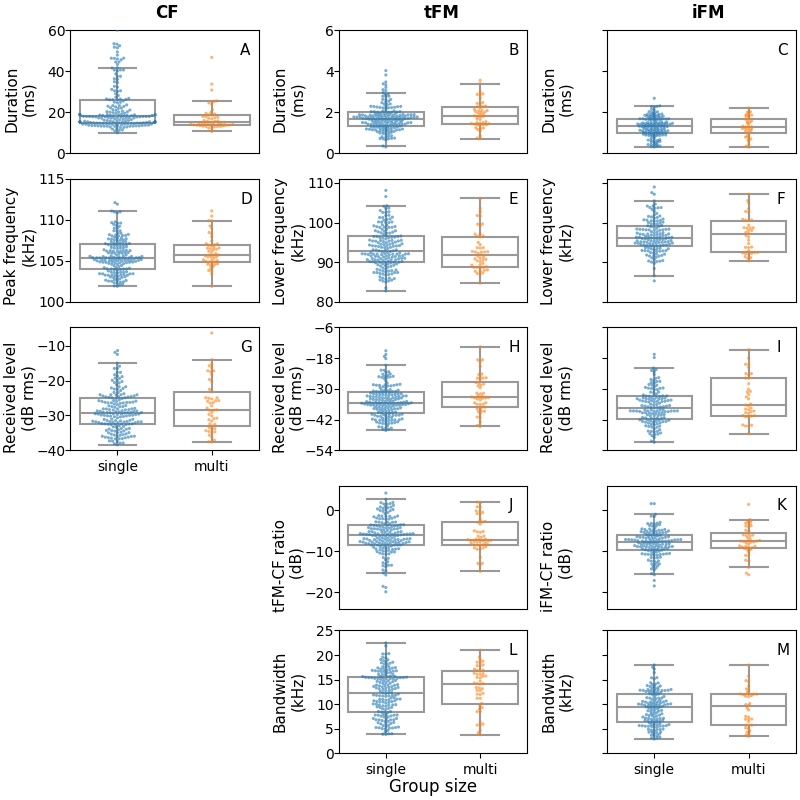

C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


In [66]:
fig2e = plt.figure(figsize=(8,8),constrained_layout=True)
spec2e = gridspec.GridSpec(ncols=3, nrows=5, figure=fig2e)
spec2e.update(wspace=0.05,hspace=0.05) # set the spacing between axes. 

f2e_ax1 = fig2e.add_subplot(spec2e[0, 0])
f2e_ax2 = fig2e.add_subplot(spec2e[0, 1])
f2e_ax3 = fig2e.add_subplot(spec2e[0, 2])

f2e_ax5 = fig2e.add_subplot(spec2e[1, 0])
f2e_ax6 = fig2e.add_subplot(spec2e[1, 1])
f2e_ax7 = fig2e.add_subplot(spec2e[1, 2])

f2e_ax9 = fig2e.add_subplot(spec2e[2, 0])
f2e_ax10 = fig2e.add_subplot(spec2e[2, 1])
f2e_ax11 = fig2e.add_subplot(spec2e[2, 2])

f2e_ax14 = fig2e.add_subplot(spec2e[3, 1])
f2e_ax15 = fig2e.add_subplot(spec2e[3, 2])


f2e_ax18 = fig2e.add_subplot(spec2e[4,1])
f2e_ax19 = fig2e.add_subplot(spec2e[4,2])

f2e_ax20 = fig2e.add_subplot(spec2e[4,0])

point_size = 2.25

ylabx, ylaby = -0.35, 0.0

newcallpart_labelx, newcallpart_labely = 0.45, 1.1

def make_subplotlabel(axesname, letter,subplotx=0.9, subploty=0.8):
    plt.text(subplotx, subploty, letter, transform=axesname.transAxes,
                             fontsize=11)

plt.sca(f2e_ax1)
plt.text(newcallpart_labelx, newcallpart_labely, 'CF', transform=plt.gca().transAxes, fontsize=12,weight='bold')
plt.sca(f2e_ax2)
plt.text(newcallpart_labelx, newcallpart_labely, 'tFM', transform=plt.gca().transAxes, fontsize=12,weight='bold')
plt.sca(f2e_ax3)
plt.text(newcallpart_labelx, newcallpart_labely, 'iFM', transform=plt.gca().transAxes, fontsize=12,weight='bold')

# Temporal
plt.sca(f2e_ax1)
sns.swarmplot(y='cf_duration',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size,alpha=0.6)
sns.boxplot(y='cf_duration',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)
plt.ylim(0,60)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby+0.2, 'Duration\n(ms)', transform=f2e_ax1.transAxes,
                             fontsize=11, rotation='vertical',multialignment='center')
f2e_ax1.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'A')

plt.sca(f2e_ax2)
sns.swarmplot(y='tfm_duration',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='tfm_duration',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)
plt.text(ylabx, ylaby+0.2, 'Duration\n(ms)', transform=plt.gca().transAxes,
                             fontsize=11, rotation='vertical',multialignment='center')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(0,6)
plt.text(ylabx, ylaby, '', transform=f2e_ax2.transAxes,
                             fontsize=11, rotation='vertical')
f2e_ax2.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'B')


plt.sca(f2e_ax3)

sns.swarmplot(y='ifm_duration',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='ifm_duration',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby+0.2, 'Duration\n(ms)', transform=plt.gca().transAxes,
                             fontsize=11, rotation='vertical',multialignment='center')
plt.ylim(0,6)
plt.text(ylabx, ylaby, '', transform=f2e_ax3.transAxes,
                             fontsize=11, rotation='vertical')
f2e_ax3.axes.yaxis.set_ticklabels([])

f2e_ax3.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'C')


# Spectral
plt.sca(f2e_ax5)
sns.swarmplot(y='cf_peak_frequency',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='cf_peak_frequency',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, 'Peak frequency\n(kHz)', transform=f2e_ax5.transAxes,
                             fontsize=11, rotation='vertical',multialignment='center')
plt.yticks(np.arange(100,120,5))
f2e_ax5.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'D')


plt.sca(f2e_ax6)
sns.swarmplot(y='tfm_terminal_frequency',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='tfm_terminal_frequency',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, 'Lower frequency\n(kHz)', transform=f2e_ax6.transAxes,
                             fontsize=11, rotation='vertical', multialignment='center')
plt.ylim(80,111); plt.yticks(np.arange(80,120,10))
f2e_ax6.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'E')


plt.sca(f2e_ax7)
sns.swarmplot(y='ifm_terminal_frequency',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='ifm_terminal_frequency',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)
plt.text(ylabx, ylaby, 'Lower frequency\n(kHz)', transform=plt.gca().transAxes,
                             fontsize=11, rotation='vertical', multialignment='center')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '', transform=f2e_ax7.transAxes,
                             fontsize=11, rotation='vertical')
plt.ylim(80,111);plt.yticks(np.arange(80,120,10))
f2e_ax7.tick_params(axis='y', which='major', pad=0.025)
f2e_ax7.axes.yaxis.set_ticklabels([])
make_subplotlabel(plt.gca(),'F')

# Received level

plt.sca(f2e_ax9)
sns.swarmplot(y='cf_rmsdb',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='cf_rmsdb',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel('');plt.ylabel('')
plt.text(ylabx, ylaby, 'Received level\n(dB rms)', transform=plt.gca().transAxes,
                             fontsize=11, rotation='vertical', multialignment='center')
f2e_ax9.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'G')


plt.sca(f2e_ax10)
sns.swarmplot(y='tfm_rmsdb',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='tfm_rmsdb',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)
plt.text(ylabx, ylaby, 'Received level\n(dB rms)', transform=plt.gca().transAxes,
                             fontsize=11, rotation='vertical', multialignment='center')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(-54,-10);plt.yticks(np.arange(-54,0,12))
plt.text(ylabx, ylaby, '', transform=f2e_ax10.transAxes,
                             fontsize=11, rotation='vertical')
f2e_ax10.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'H')


plt.sca(f2e_ax11)
sns.swarmplot(y='ifm_rmsdb',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='ifm_rmsdb',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)
plt.text(ylabx, ylaby, 'Received level\n(dB rms)', transform=plt.gca().transAxes,
                             fontsize=11, rotation='vertical', multialignment='center')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(-54,-10);plt.ylabel('');plt.yticks(np.arange(-54,0,12))
plt.text(ylabx, ylaby, '', transform=f2e_ax11.transAxes,
                             fontsize=11, rotation='vertical')
f2e_ax11.axes.yaxis.set_ticklabels([])
f2e_ax11.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'I')


# derived parameters
plt.sca(f2e_ax14)
sns.swarmplot(y='tfm-cf_dbratio',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='tfm-cf_dbratio',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(-24,6)
plt.text(ylabx, ylaby, 'tFM-CF ratio\n (dB)', transform=f2e_ax14.transAxes,
                             fontsize=11, rotation='vertical',multialignment='center')
f2e_ax14.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'J')


plt.sca(f2e_ax15)
sns.swarmplot(y='ifm-cf_dbratio',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='ifm-cf_dbratio',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(-24,6)
plt.text(ylabx, ylaby, 'iFM-CF ratio\n (dB)', transform=f2e_ax15.transAxes,
                             fontsize=11, rotation='vertical',multialignment='center')
f2e_ax15.tick_params(axis='y', which='major', pad=0.025)
plt.gca().axes.yaxis.set_ticklabels([])
make_subplotlabel(plt.gca(),'K')


callpart_labelx, callpart_labely = 0.4, -0.6

plt.sca(f2e_ax18)
sns.swarmplot(y='tfm_bw',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='tfm_bw',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel('Group size', fontsize=12, labelpad=0.5)
plt.ylim(0,25);plt.ylabel('');plt.yticks(np.arange(0,30,5))

plt.text(ylabx, ylaby+0.2, 'Bandwidth\n(kHz)', transform=plt.gca().transAxes,
                             fontsize=11, rotation='vertical', multialignment='center')
f2e_ax18.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'L')


plt.sca(f2e_ax19)
sns.swarmplot(y='ifm_bw',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='ifm_bw',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)
plt.text(ylabx, ylaby+0.2, 'Bandwidth\n(kHz)', transform=plt.gca().transAxes,
                             fontsize=11, rotation='vertical', multialignment='center')
plt.ylim(0,25);plt.ylabel('');plt.yticks(np.arange(0,30,5))
plt.xlabel('');
plt.text(ylabx, ylaby, '', transform=f2e_ax19.transAxes,
                             fontsize=11, rotation='vertical')
f2e_ax19.tick_params(axis='y', which='major', pad=0.025)
plt.gca().axes.yaxis.set_ticklabels([])

make_subplotlabel(plt.gca(),'M')


plt.sca(f2e_ax20)
plt.axis('off')
plt.savefig('measurements_and_derivedparams_multipanel.png')

**FIGURE CAPTION**: *Difference in medians with bootstrapped 95 percentile confidence intervals for measured (A-I) and derived parameters (J-M). Temporal parameters (A-C): CF duration appears to be longer in single bat calls than in multi-bat calls. This increase in duration may however be an systematic bias of our call selection protocol, which only analysed non-overlapping calls. tFM (E) and iFM (F) durations do not show any difference. Spectral parameters (D-F): The measured spectral parameters show no difference between single and multi-bat calls. Intensity parameters (G-I): multi-bat calls appear to have more intense tFM components (H), however the observed difference is relatively low around 2 dB. CF (G) and iFM (I) components show no difference in received level. Derived parameters (J-M): Most of the derived parameters show no difference between single and multi bat calls. iFM-CF ratio shows a slight increase in multi-bat calls, but this is weak at around 1 dB.*

In [64]:
np.min(multibat_indcall['cf_duration'])

10.08

In [33]:
def get_median_difference_and_CI(df):
    median_deltamed = np.median(df['difference'])
    lower, upper = np.median(df['bca_low']), np.median(df['bca_high'])
    lower_error = abs(lower-median_deltamed)
    upper_error = abs(upper-median_deltamed)
    return median_deltamed, ([lower_error],[upper_error])

def make_median_and_CI_plot(df, msmt):
    '''
    '''
    msmts = df[df['measurement']==msmt]
    by_interval = msmts.groupby('interval')
    
        
    ax = plt.gca()
    for x, (interval, df) in enumerate(by_interval):
        median, limits = get_median_difference_and_CI(df)
        ax.errorbar(x, median, yerr=limits, fmt='o',capsize=3.5)
    plt.xlim(-0.5,x+0.5)
    plt.hlines(0,-0.5,x+0.5, linestyle='--')
    plt.xlabel(''); plt.ylabel('')
    plt.xticks([])

ylabx, ylaby = -.46, 0.0

In [34]:
alldata_indcall = pd.read_csv('alldata_indcall_ci.csv')
alldata_indcall['interval'] = 0

### Median difference analysis of call parameters with clustered and isolated data folds


In [35]:
fold_type = ['clustered', 'isolated']
cluster_results = []

for each in fold_type:
    df = pd.read_csv(each+'_subset_clusteringbased_bootci.csv')
    cluster_results.append(df)
cluster_results = pd.concat(cluster_results).reset_index(drop=True)

In [36]:
all_and_cluster = pd.concat([alldata_indcall, cluster_results]).reset_index(drop=True)

In [37]:
byint = all_and_cluster.groupby('interval')
for key, _ in byint:
    print(key)

0
clustered
isolated


In [38]:
fig511 = plt.figure(figsize=(8,8),constrained_layout=True)
gs511 = gridspec.GridSpec(ncols=3, nrows=5, figure=fig511)
#gs511.update(wspace=0.05,hspace=0.05)

f511_ax1 = fig511.add_subplot(gs511[0, 0])
f511_ax2 = fig511.add_subplot(gs511[0, 1])
f511_ax3 = fig511.add_subplot(gs511[0, 2])

f511_ax5 = fig511.add_subplot(gs511[1, 0])
f511_ax6 = fig511.add_subplot(gs511[1, 1])
f511_ax7 = fig511.add_subplot(gs511[1, 2])

f511_ax9 = fig511.add_subplot(gs511[2, 0])
f511_ax10 = fig511.add_subplot(gs511[2, 1])
f511_ax11 = fig511.add_subplot(gs511[2, 2])

f511_ax14 = fig511.add_subplot(gs511[3, 1])
f511_ax15 = fig511.add_subplot(gs511[3, 2])


f511_ax18 = fig511.add_subplot(gs511[4,1])
f511_ax19 = fig511.add_subplot(gs511[4,2])

def plot_xticks_and_labels():
    plt.xticks([0,1,2],['All','Clust-\nered','Isol-\nated'], fontsize=11)


# Temporal
plt.sca(f511_ax1)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
make_median_and_CI_plot(all_and_cluster, 'cf_duration')
plt.text(ylabx, ylaby, '$\Delta$ CF duration\n(ms)', transform=f511_ax1.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax1.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'A');
plt.ylim(-10,6);plt.yticks([3,0,-3,-6,-9]);


def yticksfmtdurn():
    plt.yticks(np.arange(-1,1.5,0.5))
    plt.ylim(-1.3,1.8)

plt.sca(f511_ax2)
make_median_and_CI_plot(all_and_cluster, 'tfm_duration')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ tFM duration\n  (ms)', transform=f511_ax2.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax2.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'B')
yticksfmtdurn()
#

plt.sca(f511_ax3)
make_median_and_CI_plot(all_and_cluster, 'ifm_duration')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ iFM duration\n(ms)', transform=f511_ax3.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax3.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'C');
yticksfmtdurn()
f511_ax3.axes.yaxis.set_ticklabels([])



# Spectral
plt.sca(f511_ax5)
make_median_and_CI_plot(all_and_cluster,'cf_peak_frequency')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ CF peak freq.\n(kHz)', transform=f511_ax5.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax5.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'D');
plt.ylim(-8,4);plt.yticks(np.arange(-6,6,3))


def yticksfmterm():
    
    plt.ylim(-12,6)
    plt.yticks(np.arange(-10,10,5))

plt.sca(f511_ax6)
make_median_and_CI_plot(all_and_cluster,'tfm_terminal_frequency')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ tFM lower\nfreq. (kHz)', transform=f511_ax6.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax6.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'E');
yticksfmterm()



plt.sca(f511_ax7)
make_median_and_CI_plot(all_and_cluster,'ifm_terminal_frequency')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ iFM lower\nfreq. (kHz)', transform=f511_ax7.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax7.tick_params(axis='y', which='major', pad=0.025)
yticksfmterm()
f511_ax7.axes.yaxis.set_ticklabels([])
make_subplotlabel(plt.gca(),'F');

# Received level

plt.sca(f511_ax9)
make_median_and_CI_plot(all_and_cluster,'cf_dbrms')
plt.xlabel('');plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ CF received\n level (dB)', transform=f511_ax9.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax9.tick_params(axis='y', which='major', pad=0.025);
make_subplotlabel(plt.gca(),'G');
plt.ylim(-11,8);plt.yticks([-9,-6,-3,0,3,6])
plot_xticks_and_labels();


def yticksfm_reclevel():
    plt.ylim(-13,13)
    plt.yticks(np.arange(-12,18,6))

plt.sca(f511_ax10)
make_median_and_CI_plot(all_and_cluster,'tfm_dbrms')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([])
plt.text(ylabx, ylaby, '$\Delta$ tFM received\n level (dB)', transform=f511_ax10.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax10.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'H');
yticksfm_reclevel();


plt.sca(f511_ax11)
make_median_and_CI_plot(all_and_cluster,'ifm_dbrms')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([])
plt.text(ylabx, ylaby, '$\Delta$ iFM received\n level (dB)', transform=f511_ax11.transAxes,
                             fontsize=11, rotation='vertical')

f511_ax11.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'I');
yticksfm_reclevel();
f511_ax11.axes.yaxis.set_ticklabels([])

# derived parameters
def fmcf_yticks():
    plt.yticks([-3,0,3,6])
    plt.ylim(-4,7)

plt.sca(f511_ax14)
make_median_and_CI_plot(all_and_cluster, 'tfm-cf_dbratio')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([]);fmcf_yticks()
plt.text(ylabx, ylaby, '$\Delta$ tFM-CF ratio\n   (dB)', transform=f511_ax14.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax14.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'J');



plt.sca(f511_ax15)
make_median_and_CI_plot(all_and_cluster, 'ifm-cf_dbratio')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ iFM-CF ratio\n (dB)', transform=f511_ax15.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax15.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'K');fmcf_yticks()
plt.xticks([])
f511_ax15.axes.yaxis.set_ticklabels([])



plt.sca(f511_ax18)
make_median_and_CI_plot(all_and_cluster, 'tfm_bw')

plt.ylabel('');
plt.text(ylabx, ylaby, '$\Delta$ tFM\n bandwidth\n    (kHz)', transform=f511_ax18.transAxes,
                             fontsize=11, rotation='vertical')

f511_ax18.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'L');plt.yticks(np.arange(-3,9,3))
plot_xticks_and_labels()


plt.sca(f511_ax19)
make_median_and_CI_plot(all_and_cluster, 'ifm_bw')
#plt.ylim(0,25);plt.ylabel('');plt.yticks(np.arange(0,30,5))
plt.xlabel('');
plt.text(ylabx, ylaby, '$\Delta$ iFM\n bandwidth\n  (kHz)', transform=f511_ax19.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax19.tick_params(axis='y', which='major', pad=0.025)
;
plt.xticks([]);plt.yticks(np.arange(-3,9,3))
f511_ax19.axes.yaxis.set_ticklabels([])

make_subplotlabel(plt.gca(),'M');
plot_xticks_and_labels()




# labelling call parts 
callpart_labelx, callpart_labely = 0.4, 1.1
#tfm
plt.text(callpart_labelx, callpart_labely, 'tFM', transform=f511_ax2.transAxes, fontsize=12)
#cf
plt.text(callpart_labelx, callpart_labely, 'CF', transform=f511_ax1.transAxes, fontsize=12)
#ifm
plt.text(callpart_labelx, callpart_labely, 'iFM', transform=f511_ax3.transAxes, fontsize=12)


plt.text(-0.6,-0.68,
         'Annotations used for multi-single comparison', transform=f511_ax18.transAxes,
                             fontsize=12)
plt.savefig('figures/bootci_datafolds.png')

<IPython.core.display.Javascript object>

C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\ipykernel_launcher.py:30: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


### Observed dominant frequency ranges 

In [69]:
domfreqranges = pd.read_csv('obsvirt_domfreq_range.csv')

In [ ]:
10/2

<IPython.core.display.Javascript object>


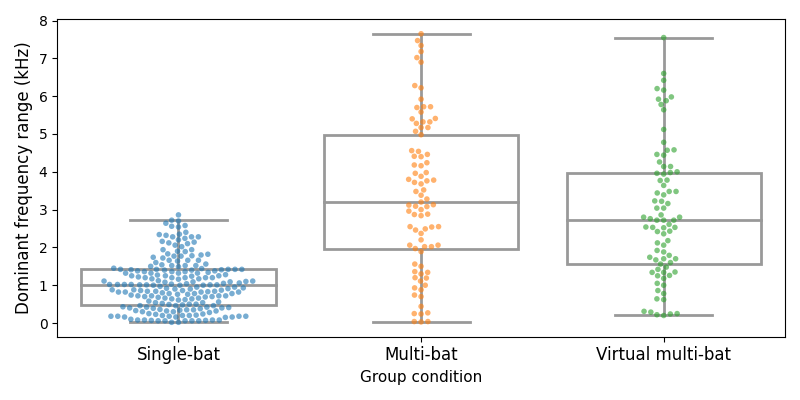

In [99]:
plt.figure(figsize=(8,4))
ax11 = plt.subplot(111)
sns.swarmplot(x='groupsize',y='file_value_range',data=domfreqranges, alpha=0.6, size=4.0)
sns.boxplot(x='groupsize',y='file_value_range',data=domfreqranges,color='white', showfliers=False, linewidth=2)
plt.ylabel('Dominant frequency range (kHz)', fontsize=12)
plt.xticks([0,1,2],['Single-bat','Multi-bat','Virtual multi-bat'], fontsize=12)
ax11.set_xlabel('Group condition', fontsize=11)
plt.tight_layout()
plt.savefig('domfreqranges.png')

In [101]:
domfreqranges.groupby('groupsize').apply(lambda X: np.nanpercentile(X['file_value_range'],[0,100]))

groupsize
multiple             [0.030000000000001137, 7.650000000000006]
multiple_virtual      [0.20000000000000284, 7.549999999999998]
single              [0.019999999999996017, 2.8599999999999994]
dtype: object

In [100]:
domfreqranges

,file_name,Unnamed: 1,file_value_range,measurement,file_name.1,num_bats,groupsize
0,matching_annotaudio_Aditya_2018-08-16_21502300...,0,0.95,dominant_frequencies,matching_annotaudio_Aditya_2018-08-16_21502300...,1,single
1,matching_annotaudio_Aditya_2018-08-16_21502300...,0,0.87,dominant_frequencies,matching_annotaudio_Aditya_2018-08-16_21502300...,1,single
2,matching_annotaudio_Aditya_2018-08-16_21502300...,0,0.02,dominant_frequencies,matching_annotaudio_Aditya_2018-08-16_21502300...,1,single
3,matching_annotaudio_Aditya_2018-08-16_21502300...,0,1.77,dominant_frequencies,matching_annotaudio_Aditya_2018-08-16_21502300...,1,single
4,matching_annotaudio_Aditya_2018-08-16_21502300...,0,2.49,dominant_frequencies,matching_annotaudio_Aditya_2018-08-16_21502300...,2,multiple
...,...,...,...,...,...,...,...
398,matching_annotaudio_Aditya_2018-08-20_0200-030...,0,5.12,dominant_frequencies,matching_annotaudio_Aditya_2018-08-20_0200-030...,2,multiple_virtual
399,matching_annotaudio_Aditya_2018-08-20_0200-030...,0,3.39,dominant_frequencies,matching_annotaudio_Aditya_2018-08-20_0200-030...,2,multiple_virtual
400,matching_annotaudio_Aditya_2018-08-20_0200-030...,0,2.61,dominant_frequencies,matching_annotaudio_Aditya_2018-08-20_0200-030...,2,multiple_virtual
401,matching_annotaudio_Aditya_2018-08-20_0200-030...,0,1.67,dominant_frequencies,matching_annotaudio_Aditya_2018-08-20_0200-030...,2,multiple_virtual


<a id='domfreqranges'></a>
### Expected and observed dominant frequency ranges

    

In [67]:
domfreq_ranges = pd.read_csv('domfreqranges_calculated_simulated.csv')
domfreq_bysource = domfreq_ranges.groupby(['source'])
single_obssim = np.median(domfreq_bysource.get_group('sim_single')['domfreq_range'])-np.median(domfreq_bysource.get_group('observed')['domfreq_range'])
singlemulti_obssim = np.median(domfreq_bysource.get_group('sim_multi')['domfreq_range'])-np.median(domfreq_bysource.get_group('observed')['domfreq_range'])

<IPython.core.display.Javascript object>


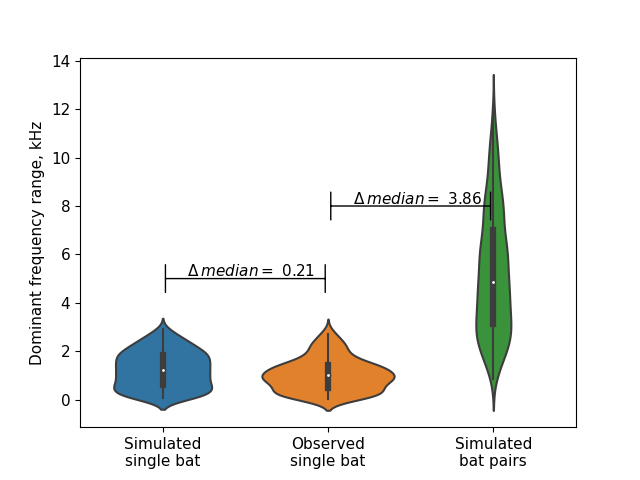

C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  
C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if __name__ == '__main__':


Text(0.5, 0, '')

In [68]:
plt.figure()
a0 = plt.subplot(111)
sns.violinplot(x='source',y='domfreq_range',data=domfreq_ranges,order=['sim_single','observed','sim_multi'])
plt.text(0.15,5.1,f'$\Delta \:median = $ {single_obssim:.2f}',fontsize=11)
plt.text(1.15,8.1,f'$\Delta \:median = $ {singlemulti_obssim:.2f}',fontsize=11)

arrow_type = '|-|'
plt.annotate(s='', xy=(1.0,8), xytext=(2,8), arrowprops=dict(arrowstyle=arrow_type))
plt.annotate(s='', xy=(0,5), xytext=(1,5), arrowprops=dict(arrowstyle=arrow_type))
plt.xticks([0,1,2],['Simulated\nsingle bat', 'Observed\nsingle bat','Simulated\nbat pairs'], fontsize=11)
plt.ylabel('Dominant frequency range, kHz',fontsize=11);plt.yticks(fontsize=11)
plt.xlabel('')